# 지하철 탑승인원 데이터 실습
## 시각화

In [2]:
#3) 밤 11시에 사람들이 가장 많이 타는 역은 어디일까?

import csv
f=open('C:/workspace/basic/time_subway.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
next(data)
mx=0		#최댓값을 저장할 변수 초기화
mx_station =''	#최댓값을 갖는 역 이름 저장 변수 초기화

t=int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : '))
#시간입력 0~23 범위에서 입력
#04시:00~부터 시작, 2개열이 해당 시간의 승차, 하차

for row in data:
    for i in range(4, 52):
        row[i] = int(row[i].replace(',',''))
    answer = row[4+(t-4)*2]	#입력 받은 시각의 승차 인원 값 추출하기
    if answer > mx:		#모든 데이터 탐색
        mx = answer
        mx_station = row[3]+'('+row[1]+')'

print(t, '시의 승차 인원이 가장 많은 역', mx_station, mx)

몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : 7
7 시의 승차 인원이 가장 많은 역 신림(2호선) 156999


In [15]:
import csv
f=open('C:/workspace/basic/time_subway.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
next(data)
mx = [0] * 24	#최댓값을 저장할 변수 초기화
mx_station = [' '] * 24 #최댓값을 갖는 역 이름 저장 변수 초기화

for row in data:
    for i in range(4, 52):
        row[i] = int(row[i].replace(',',''))
    
    for j in range(24):
        col_in = row[j*2+4]		#승차
        col_out = row[4+(j*2+1)]	#하차 
        hap = col_in + col_out
        if hap > mx[ j ]:
            mx[ j ] = hap
            mx_station[ j ] = row[3] + '(' + str(j+4) + ')'

print(mx_station)
print(mx)

['구로(4)', '구로디지털단지(5)', '신림(6)', '신림(7)', '구로디지털단지(8)', '강남(9)', '강남(10)', '강남(11)', '강남(12)', '강남(13)', '강남(14)', '강남(15)', '강남(16)', '강남(17)', '강남(18)', '강남(19)', '강남(20)', '강남(21)', '강남(22)', '신림(23)', '구로(24)', '창동(25)', '동묘앞(26)', ' ']
[7075, 34088, 72981, 180970, 343815, 295533, 160604, 144920, 161318, 190829, 190449, 209321, 226039, 300474, 404653, 249462, 188235, 232923, 132295, 45211, 4814, 10, 3, 0]


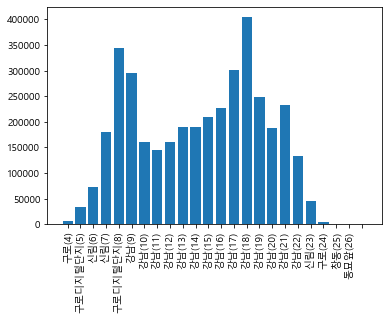

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

In [7]:
import csv
f=open('C:/workspace/basic/time_subway.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data :
    for i in range(4,52):
        row[i] = int(row[i].replace(',',''))
    for i in range(24):
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]

print(s_in)
print(s_out)

[82143, 2150693, 4486057, 11507892, 13396302, 8032648, 5970064, 6156621, 6807608, 7105063, 7214542, 7885462, 8926431, 11784214, 15720523, 8220889, 6747933, 6805731, 3730855, 771364, 8499, 48, 9, 0]
[1049, 550334, 2934242, 6711072, 15986703, 10357297, 6391027, 6003860, 6513948, 7137789, 7067275, 7455034, 8133301, 10003933, 14437968, 11670214, 6805053, 7157610, 5216506, 2238817, 221379, 62, 10, 0]


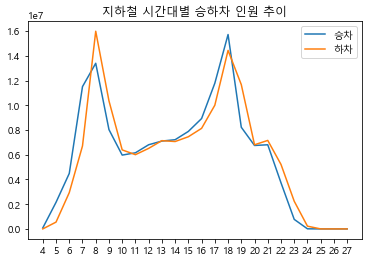

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이') #제목 추가
plt.plot(s_in, label = '승차')               #승차 인원을 꺾은선 그래프로 표현
plt.plot(s_out, label = '하차')              #하차 인원을 꺾은선 그래프로 표현
plt.legend()
plt.xticks(range(24), range(4, 28))
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # seaborn 임포트

# 한글 폰트 패스로 지정
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

#%matplotlib inline # 자동 사이즈 조정

tips = sns.load_dataset('tips') #샘플 데이타프레임 로드

titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

Text(0, 0.5, 'Total Bill')

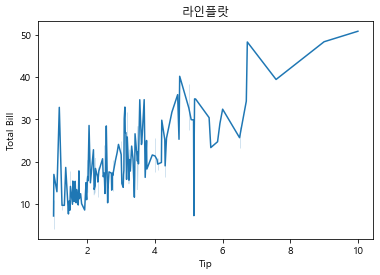

In [10]:
x = plt.subplots() 
ax = sns.lineplot(x='tip', y='total_bill', data=tips) 
ax.set_title('라인플랏') 
ax.set_xlabel('Tip') 
ax.set_ylabel('Total Bill')

In [18]:
#total_bill 질량 분포
sns.histplot(x=df['total_bill'])
#sns.displot(x=df['total_bill'], kind='hist') 

#total_bill 과 tip에 관한 질량 분포
sns.histplot(x=tips['total_bill'], y=df['tip']) 
# sns.displot(x=df['total_bill'], y=df['tip'], kind='hist')

NameError: name 'df' is not defined

<AxesSubplot:xlabel='total_bill', ylabel='Proportion'>

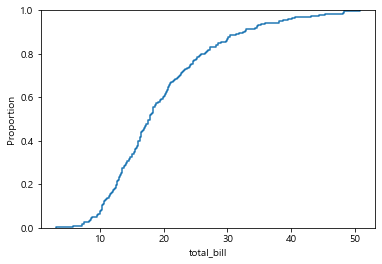

In [19]:
df = sns.load_dataset('tips') 
sns.ecdfplot(x=df['total_bill']) 
#sns.displot(x=df['total_bill'], kind='ecdf')

C:\Users\korha\anaconda3\envs\basic\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram')

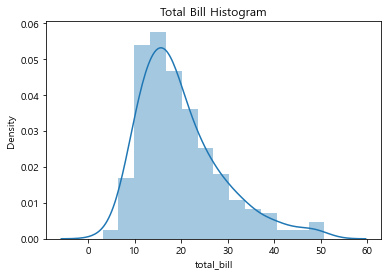

In [20]:
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill']) 

# kde=False 히스토그램만 표시
# ax = sns.distplot(tips['total_bill'], kde=False) 

# hist=False 그래프만 표시
# ax = sns.distplot(tips['total_bill'], hist=False) 

ax.set_title('Total Bill Histogram')

Text(0, 0.5, 'tip')

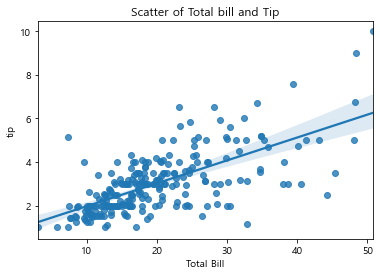

In [21]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
# ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg = False) 

ax.set_title('Scatter of Total bill and Tip') # 제목지정
ax.set_xlabel('Total Bill') 
ax.set_ylabel('tip')

<AxesSubplot:xlabel='sex', ylabel='tip'>

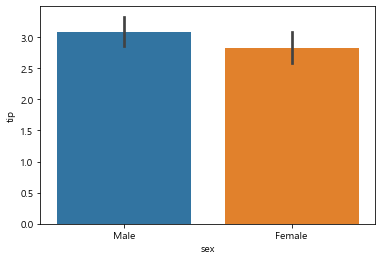

In [22]:
df = sns.load_dataset('tips') 
sns.barplot(x = df['sex'], y = df['tip'])

C:\Users\korha\anaconda3\envs\basic\lib\site-packages\seaborn\distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Kernel Densit Plot'}, xlabel='total_bill', ylabel='tip'>

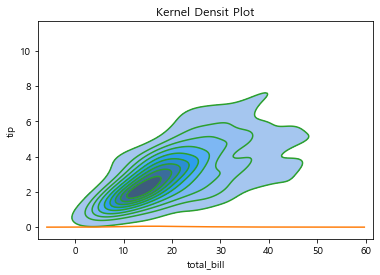

In [23]:
kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'], 
                 data2=tips['tip'], 
                 shade=True) # shade=True
ax.set_title('Kernel Densit Plot')

#단일 변수에 대한 질량 밀도(추정) 그래프
sns.kdeplot(x=df['total_bill']) 
#sns.displot(x=df['total_bill'], kind='kde')

#두개의 변수에 대한 질량 밀도(추정) 그래프
sns.kdeplot(x=df['total_bill'], y=df['tip']) 
#sns.displot(x=df['total_bill'], y=df['tip'], kind='kde')

C:\Users\korha\anaconda3\envs\basic\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


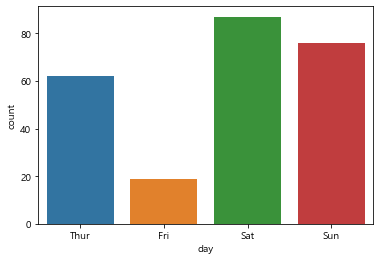

In [24]:
# tips 데이타프레임에서 요일별 데이타값을 막대그래프로 표시
tips['day'].unique() # 'day' 컬럼값 확인하기
ax = plt.subplots() 
ax = sns.countplot('day', data=tips) 

In [25]:
ax.set_title('count of days') 
ax.set_xlabel('day of week') 
ax.set_ylabel('Frequency') 

Text(16.200000000000003, 0.5, 'Frequency')

AttributeError: 'tuple' object has no attribute 'set_xticklabels'

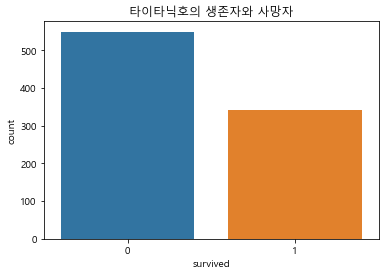

In [27]:
#타이타닉호의 각 생존자, 사망자별 , 승객 수
ax = plt.subplots() 
x = sns.countplot(x="survived", data=titanic)
plt.title("타이타닉호의 생존자와 사망자") 
ax.set_xticklabels(['생존자','사망자'], rotation=45 ) # 막대그래프 라벨
plt.show()

Text(0, 0.5, 'total_bill')

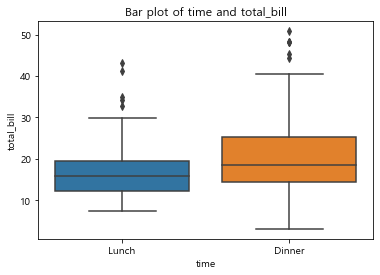

In [28]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of time and total_bill') # 제목지정
ax.set_xlabel('time') # X축 제목
ax.set_ylabel('total_bill') # Y축 제목

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

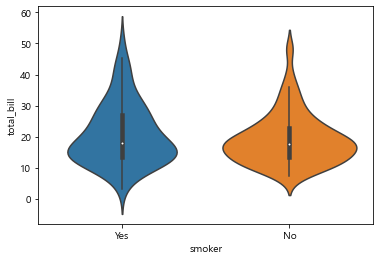

In [29]:
df = sns.load_dataset('tips')
df 
sns.violinplot(y = df['total_bill'], x = df['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

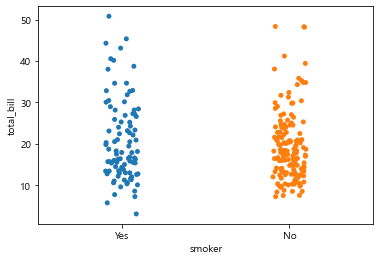

In [30]:
df = sns.load_dataset('tips')
df 
sns.stripplot(y = df['total_bill'], x = df['smoker'])

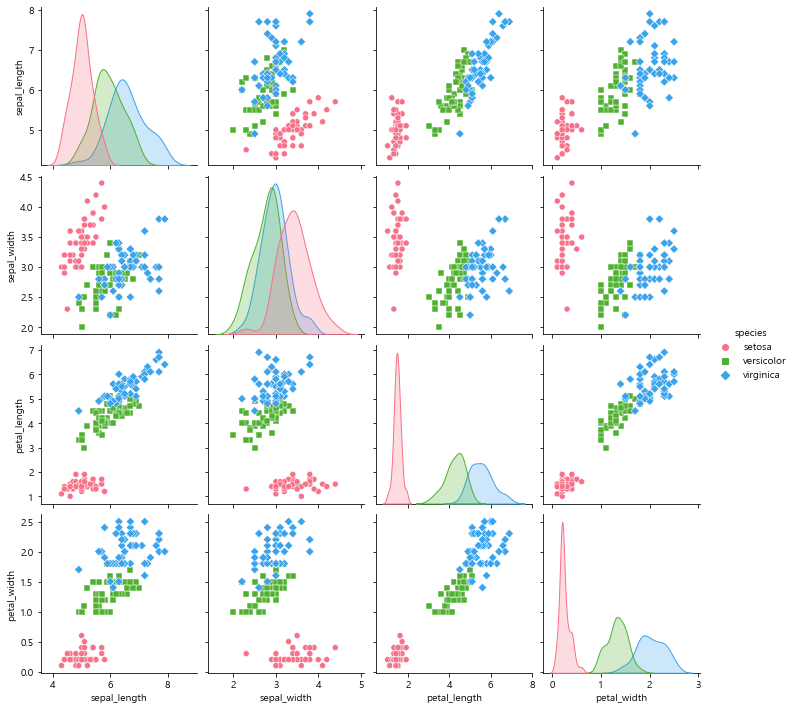

In [31]:
# Iris Pair Plot, Hue로 꽃의 종을 시각화
sns.pairplot(iris, hue="species", markers=["o", "s", "D"], palette="husl")
plt.show()

<AxesSubplot:xlabel='sex', ylabel='class'>

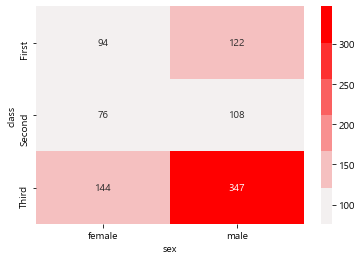

In [32]:
titanic_size = titanic.pivot_table(index='class'
,columns='sex' ,aggfunc='size')
# aggfunc='size' 각 데이터의 건수에 대해 출력
# 그냥 pivot table은 평균, 분산 등의 결과가 출력
titanic_size
sns.heatmap(titanic_size, annot=True, fmt='d', cmap=sns.light_palette('red'))
# annot=True : 숫자가 출력될 수 있게
# fmt='d' : 지수형태의 숫자가 아닌 지수형태의 숫자로 변경
# cmap=sns.light_palette('red') : 색상 결정

<AxesSubplot:xlabel='year', ylabel='month'>

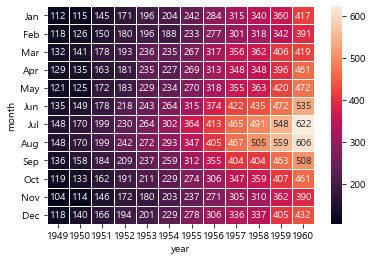

In [33]:
flights.head()
fp = flights.pivot('month','year','passengers') 
# 열인덱스, 행인덱스, 데이터 순서로 들어감
sns.heatmap(fp, linewidths=1,annot=True, fmt='d')

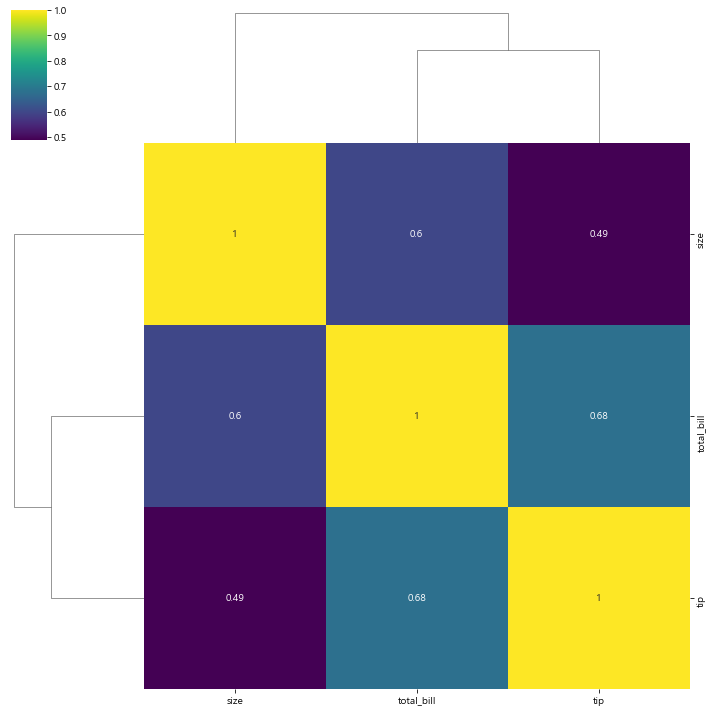

In [34]:
sns.clustermap(tips.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

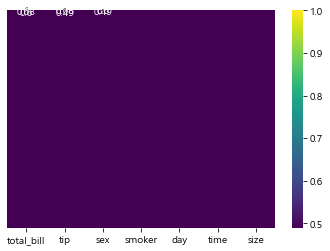

In [35]:
tips.corr() 
sns.heatmap(df.corr(), annot = True, cmap='viridis') 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

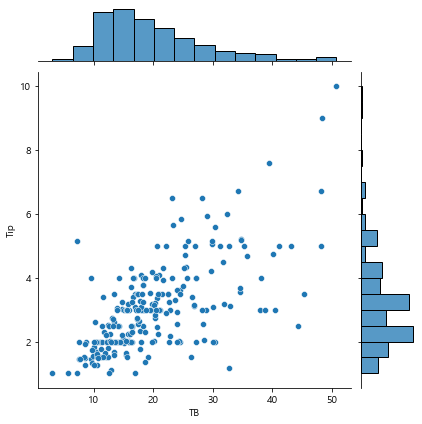

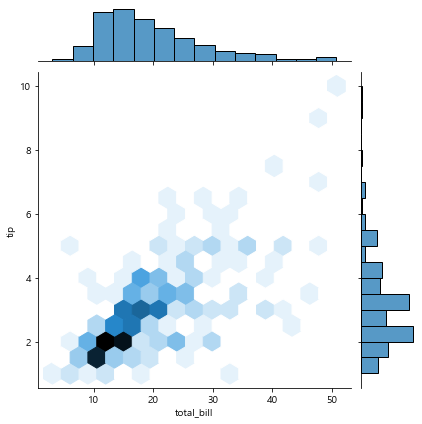

In [36]:
joint = sns.jointplot(x='total_bill',y='tip',data=tips) 
# kind='hex' 옵션을 주면 6각 

joint.set_axis_labels(xlabel='TB',ylabel='Tip') 
# jointplot에서는 regplot과 라벨 붙이는 방식이 다름
# set_axis_labels 함수를 사용해서 라벨 설정 가능
# 굳이 라벨을 설정하지 않아도 기본 column명으로 라벨 형성

sns.jointplot(x=tips['total_bill'], y=tips['tip'], kind = 'hex')

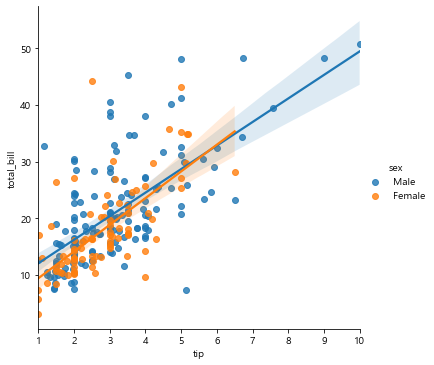

In [37]:
sns.lmplot(x = 'tip', y = 'total_bill', data = tips, hue = 'sex')

In [38]:
from konlpy.tag import Okt 
okt = Okt() 
#형태소 단위로 구문 분석
print( okt.morphs("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~") ) 

#명사만 추출
print(okt.nouns("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~")) 

#어절만 추출
print(okt.phrases("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~")) 

#형태소 단위로 쪼갠 후 각 품사들을 태깅해서 리스트 형태로 반환
#영어단어는 'Alpha'로 '^^'와 같은 기호?는 Puntuation, 'ㅋㅋㅋ'는 KoreanParticle로 분석
print(okt.pos("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~"))

['도움', '이', '되셨다면', ',', '좋아요', '꾸욱', '눌러주세요', '~']
['도움', '꾸욱']
['도움', '꾸욱']
[('도움', 'Noun'), ('이', 'Josa'), ('되셨다면', 'Verb'), (',', 'Punctuation'), ('좋아요', 'Adjective'), ('꾸욱', 'Noun'), ('눌러주세요', 'Verb'), ('~', 'Punctuation')]


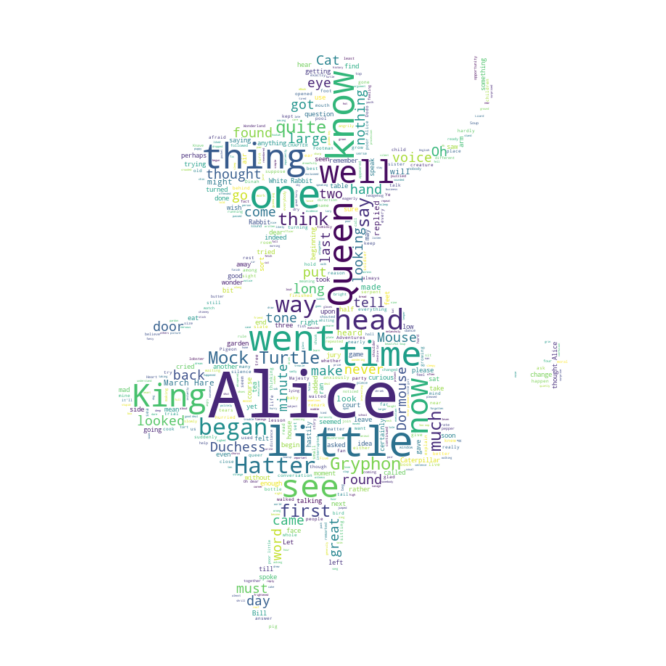

In [41]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_file = 'C:/workspace/basic/alice_mask.png'
img_file = Image.open(image_file)
alice_mask = np.array(img_file)

mystopwords = set(STOPWORDS)
mystopwords.add('said')
mystopwords.update(['hahaha', 'hohoho'])

wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask,
               stopwords=mystopwords)

stevefile = 'C:/workspace/basic/alice.txt'
myfile = open(stevefile, 'rt', encoding = 'utf-8')
text = myfile.read()

wc = wc.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
filename = 'graph02.png'
plt.savefig(filename)

C:\Users\korha\anaconda3\envs\basic\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


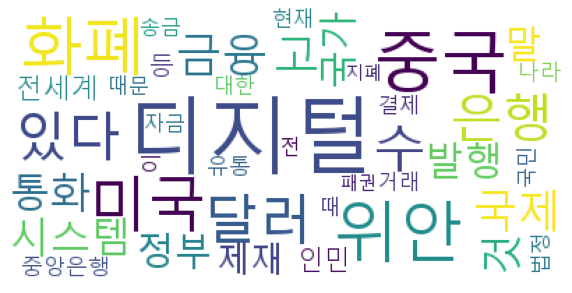

In [42]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('C:/workspace/basic/news1.txt', encoding='utf-8').read() 

twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 
noun_adj_list = []

# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='c:\Window\Fonts\malgun.ttf' ,background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
# plt.to_file('test.jpg') 대신
plt.show()


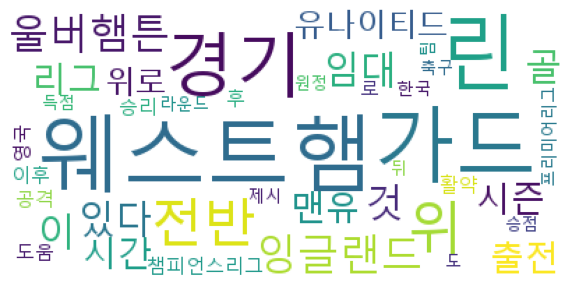

In [101]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('news.txt', encoding='utf-8').read() 

twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 
noun_adj_list = []

# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='c:\Window\Fonts\malgun.ttf' ,background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
# plt.to_file('test.jpg') 대신
plt.show()


In [43]:
import folium
from pandas import DataFrame

#예제 데이터 만들기

ex = {'경도' : [127.061026,127.047883,127.899220,128.980455,127.104071,127.102490,127.088387,126.809957,127.010861,126.836078
                ,127.014217,126.886859,127.031702,126.880898,127.028726,126.897710,126.910288,127.043189,127.071184,127.076812
                ,127.045022,126.982419,126.840285,127.115873,126.885320,127.078464,127.057100,127.020945,129.068324,129.059574
                ,126.927655,127.034302,129.106330,126.980242,126.945099,129.034599,127.054649,127.019556,127.053198,127.031005
                ,127.058560,127.078519,127.056141,129.034605,126.888485,129.070117,127.057746,126.929288,127.054163,129.060972],
      '위도' : [37.493922,37.505675,37.471711,35.159774,37.500249,37.515149,37.549245,37.562013,37.552153,37.538927,37.492388
              ,37.480390,37.588485,37.504067,37.608392,37.503693,37.579029,37.580073,37.552103,37.545461,37.580196,37.562274
              ,37.535419,37.527477,37.526139,37.648247,37.512939,37.517574,35.202902,35.144776,37.499229,35.150069,35.141176
              ,37.479403,37.512569,35.123196,37.546718,37.553668,37.488742,37.493653,37.498462,37.556602,37.544180,35.111532
              ,37.508058,35.085777,37.546103,37.483899,37.489299,35.143421],
      '구분' : ['음식','음식','음식','음식','생활서비스','음식','음식','음식','음식','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','소매','음식','음식','음식','음식','소매','음식','소매','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','음식','음식','소매','음식','음식','의료','음식','음식','음식','소매','음식','음식','음식','음식'
             ,'음식','음식','음식']}

ex=DataFrame(ex)
ex

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = ex['위도'].mean()
long = ex['경도'].mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start=9)
#m

for i in ex.index:
    sub_lat = ex.loc[i,'위도']
    sub_long = ex.loc[i, '경도']
    title = ex.loc[i, '구분']
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat, sub_long], tooltip = title).add_to(m)
    
#한글이 안나오는 오류로 html로 trouble shooting
m.save('example.html')
m

In [44]:
#지도 새로 띄우기
m = folium.Map([lat,long],zoom_start=9)

for i in ex.index:
    sub_lat =  ex.loc[i,'위도']
    sub_long = ex.loc[i,'경도']
    
    title = ex.loc[i,'구분']
  
    #구분이 소매면 빨간색으로 표시, default는 녹색
    
    color = 'green'
    if ex.loc[i,'구분'] == '소매':
        color = "red"
        
    #지도에 동그라미로 데이터 찍기    
    folium.CircleMarker([sub_lat,sub_long],color=color,radius = 5, tooltip=title).add_to(m)

#한글이 안나오는 오류로 html로 trouble shooting
m.save('example.html')
m
